# UNDERSTANDING THE DATA

## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

## LOADING THE DATA

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


## ANALYZING THE DATA

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
import matplotlib.pyplot as plt

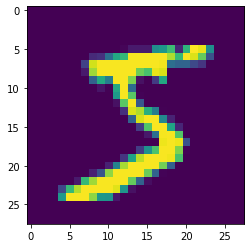

In [8]:
plt.imshow(x_train[0])

## RE-SHAPING DATA

In [9]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')

In [10]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')

## APPLYING THE ONE HOT ENCODING

In [11]:
number_of_classes = 10

In [12]:
y_train = np_utils.to_categorical(y_train, number_of_classes)

In [13]:
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## ADD CNN LAYERS

In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

## COMPILING THE MODEL

In [16]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

## TRAIN THE MODEL( FITTING THE MODEL)

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2187 - accuracy: 0.9529 - val_loss: 0.1059 - val_accuracy: 0.9695
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.0727 - val_accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0795 - val_accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.1089 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.1011 - val_accuracy: 0.9750


## OBSERVING THE METRICS

In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)

In [19]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.10113146156072617, 0.9750000238418579]


## TEST THE MODEL

In [20]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 2s 2s/step
[[3.19888191e-12 4.02542482e-17 9.49104084e-09 1.64026681e-09
  2.97573560e-17 2.13253609e-13 2.46073866e-18 1.00000000e+00
  4.85261787e-13 8.78589285e-11]
 [1.74121677e-08 6.91544200e-09 9.99999881e-01 1.39687316e-07
  7.19655658e-14 9.23316653e-13 3.60455044e-09 2.33612690e-13
  2.41546033e-10 9.44585339e-13]
 [1.34039135e-09 9.99970794e-01 9.41617884e-07 1.92941826e-11
  2.51064102e-06 2.55730047e-05 9.18738419e-09 1.64685221e-09
  1.59931517e-07 3.16654689e-13]
 [9.99978662e-01 1.20287038e-12 1.75089525e-07 1.37529484e-11
  3.40212997e-10 4.14499102e-09 1.96628025e-05 3.89348486e-14
  1.06599325e-08 1.56214321e-06]]


## OBSERVING THE METRICS

In [21]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.10113146156072617, 0.9750000238418579]


## TEST THE MODEL

In [22]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[3.19888191e-12 4.02542482e-17 9.49104084e-09 1.64026681e-09
  2.97573560e-17 2.13253609e-13 2.46073866e-18 1.00000000e+00
  4.85261787e-13 8.78589285e-11]
 [1.74121677e-08 6.91544200e-09 9.99999881e-01 1.39687316e-07
  7.19655658e-14 9.23316653e-13 3.60455044e-09 2.33612690e-13
  2.41546033e-10 9.44585339e-13]
 [1.34039135e-09 9.99970794e-01 9.41617884e-07 1.92941826e-11
  2.51064102e-06 2.55730047e-05 9.18738419e-09 1.64685221e-09
  1.59931517e-07 3.16654689e-13]
 [9.99978662e-01 1.20287038e-12 1.75089525e-07 1.37529484e-11
  3.40212997e-10 4.14499102e-09 1.96628025e-05 3.89348486e-14
  1.06599325e-08 1.56214321e-06]]


## SAVE THE MODEL

In [23]:
model.save('models/mnistCNN.h5')

## TEST WITH THE SAVED MODEL

In [27]:
from tensorflow.keras.models import load_model
model=load_model(r'C:\Users\meena\models\mnistCNN.h5')


In [28]:
from PIL import Image
import numpy as np

In [30]:
for index in range(4):
    img=Image.open('C:/Users/meena/'+str(index)+'.png').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 43ms/step
[[0.10841566 0.12407556 0.10467492 0.11038405 0.10014889 0.09499744
  0.11055182 0.08980202 0.0652207  0.09172902]]
1/1 [==============================] - 0s 17ms/step
[[0.09725864 0.11159753 0.0982668  0.09654304 0.0973888  0.09526405
  0.0975828  0.10167139 0.10338041 0.10104661]]
1/1 [==============================] - 0s 16ms/step
[[0.09728516 0.11177601 0.09809107 0.09665568 0.09739827 0.09523997
  0.09752914 0.1015369  0.10340285 0.10108501]]
1/1 [==============================] - 0s 15ms/step
[[0.0844951  0.09609288 0.11283562 0.09120862 0.09871554 0.09917869
  0.0905946  0.08719209 0.10847224 0.13121456]]
